In [1]:
import circularsocieties
from circularsocieties import CircularSociety

## Examples

### Example 1

Circular Society Name: S1
Spectrum: [0, 10].  (Note: we identify 0 = 10)
Number of Voters: 5
Approval Sets:
 Set1: [3, 5]
 Set2: [0,3] U [6, 10]
 Set3: [5, 8]
 Set4: [0,1] U [7, 10]
 Set5: [6, 9]
4
7


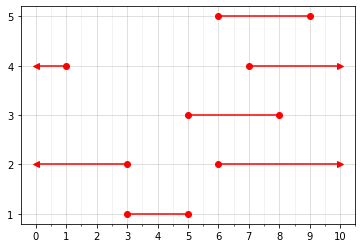

In [2]:
# Example 1  (Run this cell by pressing Shift + Enter or clicking the "play" button to the side)

# Creating a circular society named A (with a string name "S1") where the spectrum is [0, 10] (where 0 = 10)
A = CircularSociety( "S1", 10)

#   Adding sets 
A.addApprovalSet( "Set1", 3, 5 )  # "Set1" is the set's name, left endpoint = 3, right endpoint = 5
A.addApprovalSet( "Set2", 0, 2 )
A.addApprovalSet( "Set3", 5, 8 )
A.addApprovalSet( "Set4", 7, 1 )
A.addApprovalSet( "Set5", 6, 9 )
A.addApprovalSet( "Set6", 2, 4 )

#  Editing an existing set
A.editApprovalSet( "Set2", 6, 3)

#  Removing a set (by its names)
A.removeApprovalSet( "Set6" )

#  Displaying the circular society's information (name, is it uniform, the spectrum, number of voters, list of approval sets) 
A.printSocietyInfo()

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
A.visualize( )

#  Checking if the set is left-right alternating (returns True or False)
A.is_LR_alt()

# Finding the agreement number of the society
a, pos = A.findAgreementNumber()
print(a)
print(pos)

### Example 2

Circular Society Name: Soc1
Spectrum: [0, 7].  (Note: we identify 0 = 7)
Number of Voters: 7
Approval Sets:
 Set 1: [0, 3.5]
 Set 2: [1, 4.5]
 Set 3: [2, 5.5]
 Set 4: [3, 6.5]
 Set 5: [0,0.5] U [4, 7]
 Set 6: [0,1.5] U [5, 7]
 Set 7: [0,2.5] U [6, 7]
(['LSet 1', 'RSet 5', 'LSet 2', 'RSet 6', 'LSet 3', 'RSet 7', 'LSet 4', 'RSet 1', 'LSet 5', 'RSet 2', 'LSet 6', 'RSet 3', 'LSet 7', 'RSet 4'], [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
Is the society left-right alternating? True
Agreement number is:  4
Location of max agreement along the horizontal axis (potentially one of several):  0


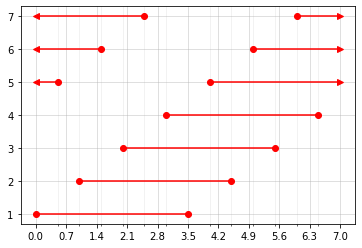

In [3]:
# Example 2 (Run this cell by pressing Shift + Enter or clicking the "play" button to the side)

# Generating a Uniform Society named S1 (with a string name "Soc1"), U(7, 4)
S1 = circularsocieties.generateUniformCircularSociety( "Soc1", 7, 4)

#  Displaying the circular society's information (name, is it uniform, the spectrum, number of voters, list of approval sets) 
S1.printSocietyInfo()

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S1.visualize( )

# Displaying the list of left/right endpoints starting from x = 0.
print(S1.listSetEndpoints())

# Checking if the set is left-right alternating (returns True or False)
print("Is the society left-right alternating?", S1.is_LR_alt() )

# Find the agreement number of this society
a, location = S1.findAgreementNumber()
print("Agreement number is: ", a)
print("Location of max agreement along the horizontal axis (potentially one of several): ", location)

### Example 3a

Circular Society Name: A
Spectrum: [0, 10].  (Note: we identify 0 = 10)
Number of Voters: 10
Approval Sets:
 Set 1: [1.2672448750566767, 5.142017308758076]
 Set 2: [1.012580142772641, 2.6525486066313397]
 Set 3: [0,0.2763286789174091] U [5.671079711241608, 10]
 Set 4: [0,1.3347830617342749] U [6.695779483821999, 10]
 Set 5: [4.7894083832938925, 5.994872411774862]
 Set 6: [0.6108710026604036, 9.621458321427763]
 Set 7: [5.6518972091247255, 8.42532382788663]
 Set 8: [0,8.901884209183985] U [9.881913001268215, 10]
 Set 9: [1.1881518437138072, 4.104549700616079]
 Set 10: [0,6.682094440546366] U [8.313399780043314, 10]
Agreement number is:  7
Location of max agreement along the horizontal axis (potentially one of several):  1.2672448750566767


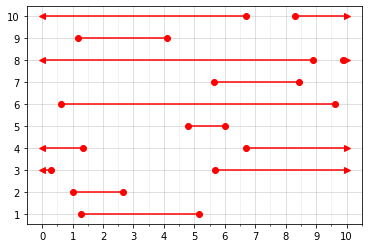

In [4]:
# Example 3a: Randomly-generated circular societies

S2 = circularsocieties.generateRandomSociety( 'A', 10, 10, epsilon = 0.5 )
S2.printSocietyInfo()
S2.visualize(  )
a2, location2 = S2.findAgreementNumber()

print("Agreement number is: ", a2)
print("Location of max agreement along the horizontal axis (potentially one of several): ", location2)

### Example 3b: Randomly-generated circular Societies

Given a society whose approval sets are randomly generated (with a particular distribution), what is the distribution of the approval number of the random society?

In [5]:
# Generate R random societies, each with N voters
#   Each approval set has endpts from the uniform distribution on [0, modulo]

import numpy as np
import matplotlib.pyplot as plt

R = 100
N = 10
modulo = 10

approval = np.empty([R,])

for i in np.arange(0, R):
  S = circularsocieties.generateRandomSociety( 'A', N, modulo, epsilon = 0.5, mode = 2, a = 2, b=2 )
  approval[i], a = S.findAgreementNumber()

(array([11.,  0.,  0., 46.,  0.,  0., 35.,  0.,  0.,  8.]),
 array([0.6 , 0.63, 0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 ]),
 <a list of 10 Patch objects>)

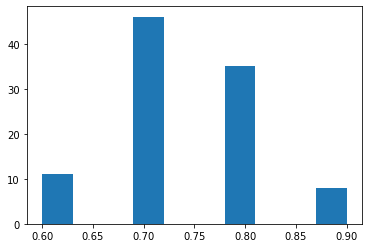

In [6]:
approvalRatio = approval/N
plt.hist(approvalRatio, bins = 10)

In [7]:
np.mean(approvalRatio)

0.74

In [8]:
S.printSocietyInfo()

Circular Society Name: A
Spectrum: [0, 10].  (Note: we identify 0 = 10)
Number of Voters: 10
Approval Sets:
 Set 1: [0.9616010140161724, 6.170486153513523]
 Set 2: [0.8531208796732426, 8.42308152941218]
 Set 3: [0,7.2782530898102635] U [8.834190142137526, 10]
 Set 4: [0,0.22778565208118806] U [5.351170320240062, 10]
 Set 5: [0,3.5599432449670427] U [7.654038660407942, 10]
 Set 6: [0,3.666287170612865] U [8.723237929114179, 10]
 Set 7: [6.921883957808549, 7.656189044133397]
 Set 8: [0,4.602830130662017] U [8.794301991845469, 10]
 Set 9: [0,2.739830617569371] U [8.927354090273163, 10]
 Set 10: [0,1.216002339225314] U [2.5215331668719343, 10]


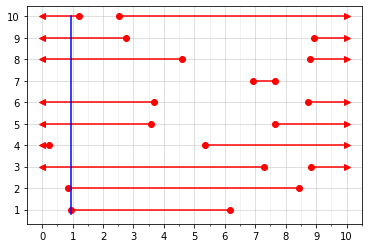

In [9]:
S.visualize( drawAgreement = True )

In [10]:
S.findAgreementNumber()

(8, 0.9616010140161724)

### Example 4: Experiments with randomly-generated fixed length societies

--------
Before any transformations
Agreement number: 2
Piercing number: 2
--------


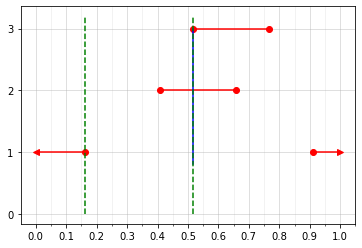

In [40]:
# ---
# Random Example
N = 3 # number of approval sets
modulo = 1 # circumference of the circular society
p = 0.25

S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )

# ---
# Finding the agreement number of the society
a, position = S.findAgreementNumber()

print("--------")
print("Before any transformations")
print("Agreement number:", a)
p, _, _, _ = S.findPiercingNumber()
print("Piercing number:", p)
S.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

In [41]:
S.printSocietyInfo()
tau, piercingset, _, _ = S.findPiercingNumber()
print(piercingset)

Circular Society Name: Fixed length society 1
Spectrum: [0, 1].  (Note: we identify 0 = 1)
Number of Voters: 3
Approval Sets:
 Set 1: [0,0.16063754513460626] U [0.9106375451346062, 1]
 Set 2: [0.4073645065597533, 0.6573645065597533]
 Set 3: [0.5155866555769678, 0.7655866555769678]
[0.16063755 0.51558666]


--------
After Hardin's transformations
Agreement number after LR-alternation: 2
Piercing number after LR-alternation: 2
--------


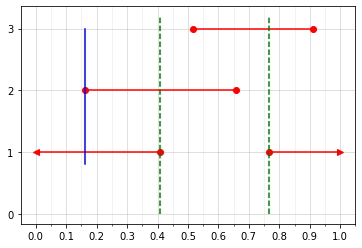

In [42]:
# Apply transformations
Snew = copy.deepcopy(S)
Snew.uniformize()

print("--------")
print("After Hardin's transformations")
anew, _ = Snew.findAgreementNumber()
print("Agreement number after LR-alternation:", anew)
pnew, _, _, _ = Snew.findPiercingNumber()
print("Piercing number after LR-alternation:", pnew)
Snew.visualize( drawAgreement = True, drawPiercing = True )
print("--------")

### Example 5: Checking (k, m)-agreeability

1
[]


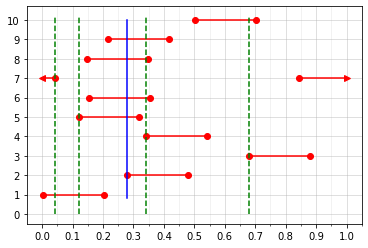

In [49]:
# Creating a circular society S, the spectrum is [0, 1]
N = 10 # number of approval sets
modulo = 1 # circumference of the circular society platform
p = 0.2 # length of the society

S = circularsocieties.generateRandomFixedLengthSociety( "Fixed length society 1", N, modulo, p, tick=0.05 )

#  Visualizing the circular society; each set is plotted horizontally (different y coordinates for different sets)
S.visualize( drawAgreement = True, drawPiercing = True )

is_kmagreeable, bad_m_sets = S.checkAgreeability(4, 9)
print(is_kmagreeable)
print(bad_m_sets)

In [50]:
is_kmagreeable, bad_m_sets = S.checkAgreeability(2, 3)
print(is_kmagreeable)
print(bad_m_sets)

0
[['Set 1', 'Set 2', 'Set 3'], ['Set 1', 'Set 2', 'Set 10'], ['Set 1', 'Set 3', 'Set 4'], ['Set 1', 'Set 3', 'Set 9'], ['Set 1', 'Set 9', 'Set 10'], ['Set 2', 'Set 7', 'Set 10'], ['Set 3', 'Set 4', 'Set 5'], ['Set 4', 'Set 5', 'Set 7'], ['Set 5', 'Set 7', 'Set 10'], ['Set 6', 'Set 7', 'Set 10'], ['Set 7', 'Set 8', 'Set 10'], ['Set 7', 'Set 9', 'Set 10']]
